I'm always interested in freelancing and wonder how freelancers can earn money from the clients, specifically, I want to know what kinds of jobs are provided,what skills are mostly needed and how much are they priced.
Bear these questions in my mind, I explored the job posts on upwork and had some interesting discoveries.

## Data Preview

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

jobs_df = pd.read_csv('upwork_datascience_jobs.csv')
print 'The shape is:',jobs_df.shape
# a brief view
jobs_df.head()

The shape is: (2210, 4)


,title,payment,skill,description
0,Need a data mining manager,10-30 hrs/week,"[{""skill"":""Data Entry""},{""skill"":""Data Mining""...",We need a technical person that can manage dat...
1,Real Estate Matching Engine for Buyers with Da...,$250,"[{""skill"":""Microsoft Access Programming""},{""sk...",Require a Microsoft access program that allows...
2,Excel Spreadsheet Formatting,10-30 hrs/week,[],I need someone to assist with creating two wor...
3,Data scientist in financial market for research,10-30 hrs/week,"[{""skill"":""Artificial Intelligence""},{""skill"":...",Evaluation and screening will be based on :\n\...
4,Microsoft Excel Stock Update from Web data,$20,"[{""skill"":""Excel VBA""},{""skill"":""Microsoft Exc...",I’m looking for a Microsoft Excel spreadsheet ...


The dataset we got has a job list with 2210 posts, each posts provide information of job title, payment, skill-sets and description.
I will try to picture the market needs given these data, the question in my mind is what skills are needed in the real world and how much the clients would like to pay.


## Payment Overview

Not all projects give a fixed price, a lot of them provide hourly paid agreement to freelancers. To have an overview of the payments, we should first pick out the rows that have explicit budgets.

In [3]:
# pick out the rows with fixed payments 
budget = jobs_df.loc[lambda df:df['payment'].str.find('$')>=0]

# data cleaning, only number remains
valid = '1234567890.' 
def sanitize(data):
    return float(''.join(filter(lambda char: char in valid, data)))

budget.loc[:,'payment'] = budget['payment'].apply(sanitize)

/Library/Python/2.7/site-packages/pandas/core/indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


The processed dataframe shows that there are 1008 posts which have fixed price, so what about the distribution of these prices, let's call the function of describe() and distribution visualization function provided by seaborn.


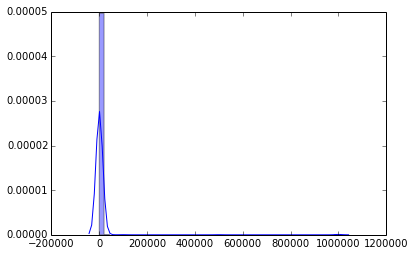

In [4]:
budget.describe()

sns.distplot(budget['payment'].tolist())

The statistic figures show that the total number of posts is 1008, the average budget is $4180, not bad, however 75 percent of all offers no more than $300, that means there are several posts which give extremely high price like $1000000, it is too large to be true.. we need to set them aside to get more normal analysis results, we can assume a reasonable threshold of $5000.

           payment
count   989.000000
mean    372.062690
std     782.802599
min       5.000000
25%      40.000000
50%     100.000000
75%     300.000000
max    5000.000000


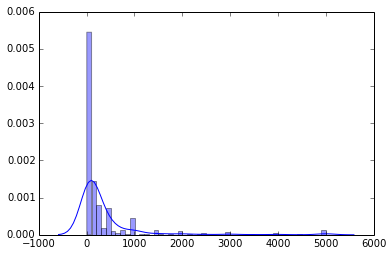

In [5]:
# Select rows with payment less than 5000
budget_normal = budget[budget['payment']<=5000]

# Describe the selected rows
print budget_normal.describe()

# The bar view
sns.distplot(budget_normal['payment'].tolist(), bins=50)

The description data verified my assumption, 989 posts have budgets under $5000, 50 percent of them did't exceed $100.

## Skils needed overview

When clients send job posts, they will choose skill tags that they mostly want, so it's essential to learn the distribution of skill sets. We can simply draw a picture of wordcloud at first.

(-0.5, 799.5, 399.5, -0.5)

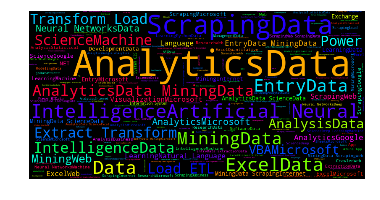

In [6]:
# json to list
import json
from wordcloud import WordCloud

# collect all skills
all_skills = []
for index, row in jobs_df.iterrows():
    skills =json.loads(row['skill'])
    if not skills:
        continue
    for skill in skills:
        all_skills.append(skill['skill'])
        
        
wordcloud = WordCloud( width=800, height=400).generate("".join(all_skills))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

The world cloud depicts more wanted skills with bigger size of words, so clearly the above picture shows that "Analytics Data","Scraping Data",and "Artificial Intelligence" are more bigger which means they are more popular.
Lets switch a view with some detailed statistics of top 10 skill tags.

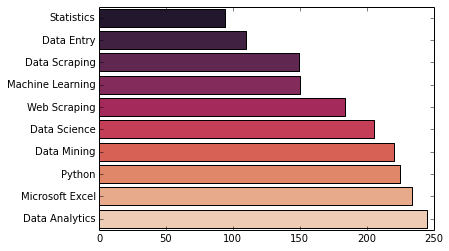

In [7]:
#print sorted(all_skills)
skills_count = {}
for skill in all_skills:
    if skill in skills_count:
        skills_count[skill] += 1
    else:
        skills_count[skill] = 0
    
## display top 10 skills with their apparences
sorted_skills_count = sorted(skills_count.items(), key=lambda x: x[1])
top_skills = zip(*sorted_skills_count[-10:])[0]
top_skills_count = zip(*sorted_skills_count[-10:])[1]
sns.barplot(x=list(top_skills_count), y=list(top_skills), palette="rocket")

The above chart tells us that the most required skill is Data Analytics, that doesn't make sense. The second place is Microsoft Excel which is beyond my imagination. 'Python' occupies the third place which states the domination of Python in data science. It's noticeable that Web Scraping and Data scraping stand at 6th and 8th place, the two skills combined would rank No.1 and outrank Machine learning a lot in demands, that's an interesting indicator for freelance job hunters focusing at Machine Learning skills.

## Skills - Price

Finally, we get to our most interesting question which is how clients would pay for the skills. The strategy I use is merely counting all the budgets on each skill tag and ranking skills by their average budgets. We need to use the posts data with fixed budgets.

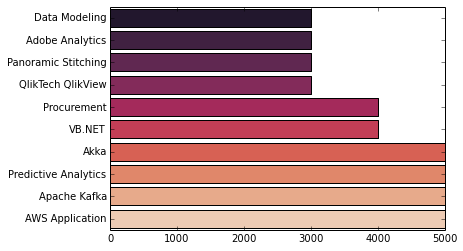

In [11]:
skill_price = {} # skill:[totalpay, count]
for index, row in budget_normal.iterrows():
    skills =json.loads(row['skill'])
    row['sill'] = [lambda sk:sk['skill'], skills]
    for sk in skills:
        skill = sk['skill']
        if skill in skill_price:
            skill_price[skill][0] += row['payment']
            skill_price[skill][1] += 1
        else:
            skill_price[skill] = [row['payment'], 1]
            
#average
skill_price_averaged = {}
for k in skill_price.keys():
    skill_price_averaged[k] = skill_price[k][0]/skill_price[k][1]

            
sorted_skill_price = sorted(skill_price_averaged.items(), key=lambda x:x[1])
top_price_skills = zip(*sorted_skill_price[-10:])[0]
top_price_skills_price = zip(*sorted_skill_price[-10:])[1]
sns.barplot(x=list(top_price_skills_price), y=list(top_price_skills), palette="rocket")

The result is impressive, it seems that the top 10 highest priced skills are not "hot" techniques we assumed, Format & Layout and Bookkeeping dominate the first and second places, I looked into the details of the posts related to the two jobs, it turned out that what the clients are looking for are software solutions or professional editors.
As to other skills, AWS application is at the 3rd place, it seems that AWS products are widely used and need proficient freelancers. Predictive Analytics which is relative to machine learning only occupies the 5th place, that is not a shining performance considering how is it focused by the academic and the press.

## What I learned

We may consider Data science jobs is all about machine learning, algorithms, etc. , but the market clearly don't think so.The clients who pay you may consider that skills like data analysis, web scraping and AWS development are more important to their business. Job seekers on data science may need to learn the reality first and check with themselves what values they can bring to the thriving market.